<a href="https://colab.research.google.com/github/yaj0212/Introductory-Machine-Learning/blob/main/demos/pca/pca-demo-redux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Demo code for Principal Components Analysis (PCA)

We'll continue from last time and quickly look at the "Labeled Faces in the Wild" dataset.
Let's not forget the important issue of [societal bias in such datasets](https://www.youtube.com/watch?v=YjssfP-SeH4&t=852s).

First import some packages

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
%matplotlib inline

Now load the data

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
height, width = (50, 37)
names = lfw_people.target_names
names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

Label 3 corresponds to George W. Bush (a Yalie). Here is the average of the GWB faces in the dataset.

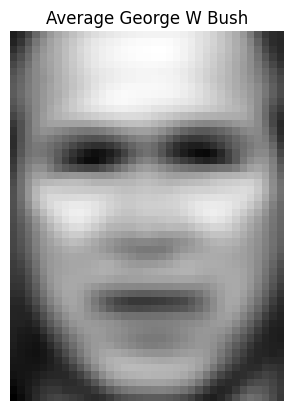

In [3]:
label = 3
images = X[(y==label),:]
avgimg = images.mean(0)
_ = plt.imshow(avgimg.reshape((height, width)), cmap=plt.cm.gray)
_ = plt.title('Average %s' % names[label])
_ = plt.axis('off')

Here is a utility function to plot the images

In [4]:
def plot_images(images, titles, h, w, n_row=3, n_col=4, reversed=False):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        if reversed:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        else:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray.reversed())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


Run PCA

In [5]:
num_components = 100
pca = PCA(num_components).fit(images)

Extract the principal vectors. (Confusingly, these are called `components_` by sklearn.)

In [6]:
principal_vectors = pca.components_.reshape((num_components, height, width))

How much variance is explained by these top principal vectors?

In [7]:
ratio = pca.explained_variance_ratio_.sum()
print('%s' % names[label])
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

George W Bush
Variance explained by first 100 principal vectors: 93.83%


Let's display the principal vectors, as images

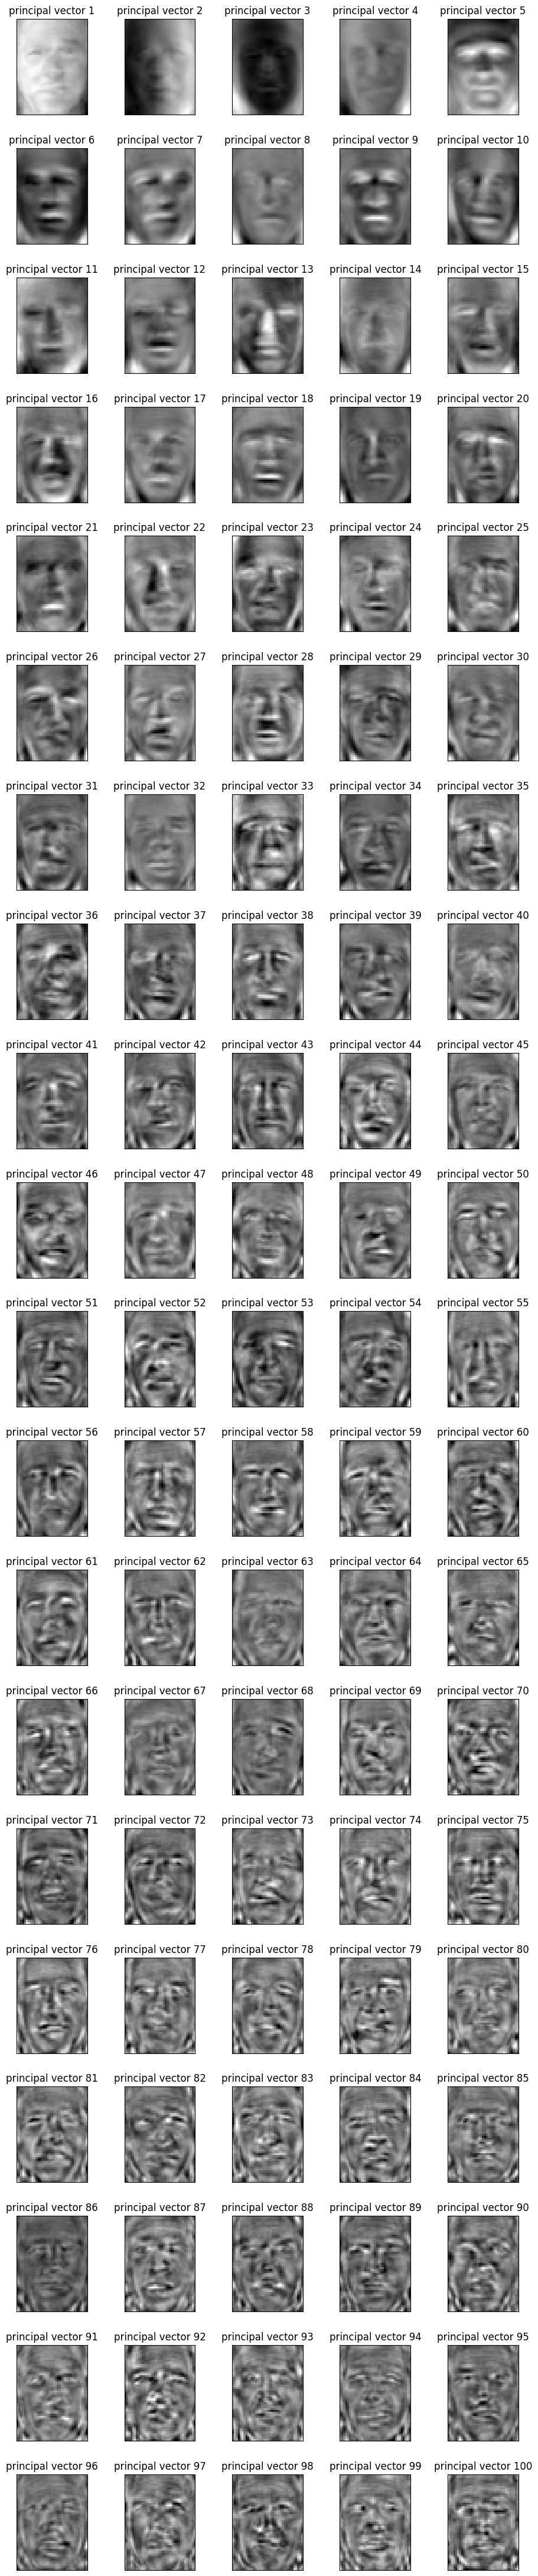

In [8]:
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5, reversed=True)

The `fit_transform function` computes the principal components, and the `inverse_transform` function then approximates the data in terms of the principal vectors. Below we'll compute this same approximation "by hand."

In [ ]:
pcs = pca.fit_transform(images)
approx = pca.inverse_transform(pcs)

Let's visualize the approximation.

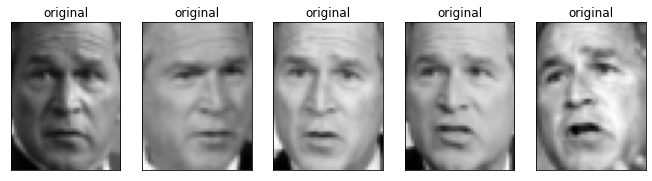

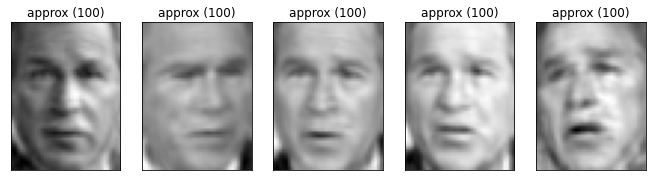

In [ ]:
num_samples = 5
sample = np.random.choice(images.shape[0], num_samples)
plot_images(images[sample,:], ['original' for i in range(num_samples)], height, width, 1, num_samples, reversed=True)
plot_images(approx[sample,:], ['approx (%d)' % num_components for i in range(5)], height, width, 1, num_samples, reversed=True)

A helper function to display an original image and its approximation.

In [ ]:
def plot_face_reconstruction(x, xhat, title1='', title2=''):
    face = x.reshape(height, width)
    clear_output(wait=True)
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    plt.imshow(face, cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    plt.title(title1)
    face = xhat.reshape(height, width)
    plt.subplot(1, 2, 2)
    plt.imshow(face, cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    plt.title(title2)
    plt.show()
    sleep(.2)


George and Average George

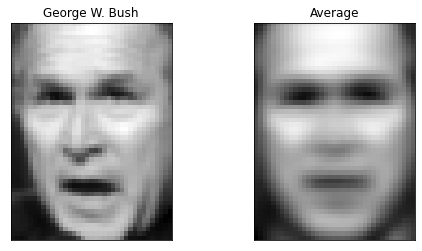

In [ ]:
x = np.add(images[44], avgimg)
plot_face_reconstruction(x, avgimg, 'George W. Bush', 'Average')

$\def\phi{v}$

Now we'll compute increasingly accurate approximations directly. Recall how this is done
mathematically:

$$\hat x = \overline x + \sum_{k=1}^K (x^T \phi_k) \phi_k$$

The number $x^T \phi_k$ is the amount of $x$ that lies in the direction of the
principal vector $\phi_k$. This is easily translated into Python:

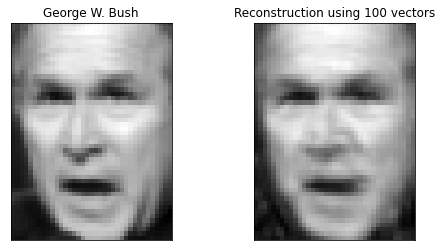

In [ ]:
v = principal_vectors.reshape(num_components, height*width)

xhat = avgimg
for k in np.arange(num_components):
    xhat = xhat + np.dot(x, v[k]) * v[k]
    plot_face_reconstruction(x, xhat, 'George W. Bush', 'Reconstruction using %d vectors' % (k+1))

What do you think would happen if you constructed the approximation in the reverse order, starting with principal component $100$ and working your way back to principal component 1? Give it a try!